In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st



In [ ]:
df = pd.read_csv('Crop_recommendation.csv')

In [ ]:


# Handle missing values (if any) - Check for missing values first
print("Missing values before handling:")
print(df.isnull().sum())

# There are no missing values in this dataset, so no action is needed for this specific dataset.
# If there were missing values, you might use:
# df.fillna(method='ffill', inplace=True) # Example: forward fill
# df.dropna(inplace=True) # Example: drop rows with missing values

# Encode categorical data (the 'label' column)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Separate features and target variable
X = df.drop('label', axis=1)
y = df['label']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nData exploration and preprocessing complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nSample of preprocessed data (X_train):")
print(X_train.head())
print("\nSample of preprocessed labels (y_train):")
print(y_train.head())

Missing values before handling:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Data exploration and preprocessing complete.
Shape of X_train: (1760, 7)
Shape of X_test: (440, 7)
Shape of y_train: (1760,)
Shape of y_test: (440,)

Sample of preprocessed data (X_train):
             N         P         K  temperature  humidity        ph  rainfall
1656 -0.909043 -1.132946 -0.674398    -1.821200  0.929960  0.201688 -0.009455
752  -0.367169  0.777396 -0.575655     0.380754 -0.095869  0.871667 -0.619789
892  -1.179980  0.595459 -0.457163     0.376410 -0.375117  1.057918 -1.060229
1041  1.366828  0.504490 -0.002944    -0.050498  0.159495 -0.590341  0.238225
1179 -1.369636 -1.102623 -0.358420     1.947328 -1.056190 -0.246001 -0.103246

Sample of preprocessed labels (y_train):
1656    16
752      2
892     10
1041     1
1179    12
Name: label, dtype: int64


Implementing and evaluating K-Nearest Neighbors (KNN)...
KNN Accuracy: 0.9568
KNN Precision: 0.9629
KNN Recall: 0.9568
KNN F1-score: 0.9567


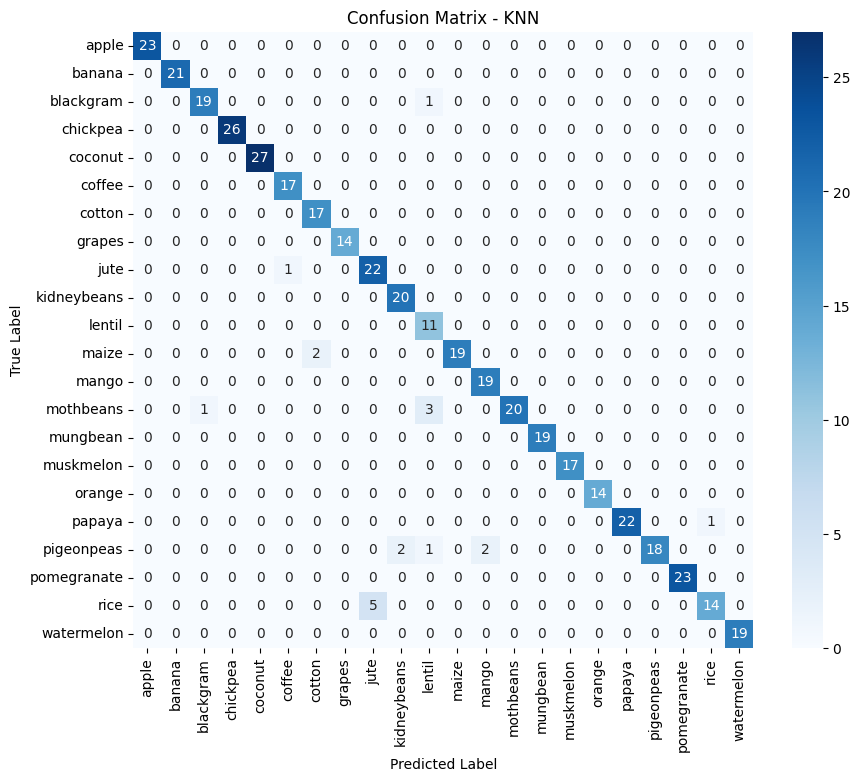



Implementing and evaluating Decision Tree Classifier...
Decision Tree Accuracy: 0.9864
Decision Tree Precision: 0.9868
Decision Tree Recall: 0.9864
Decision Tree F1-score: 0.9863


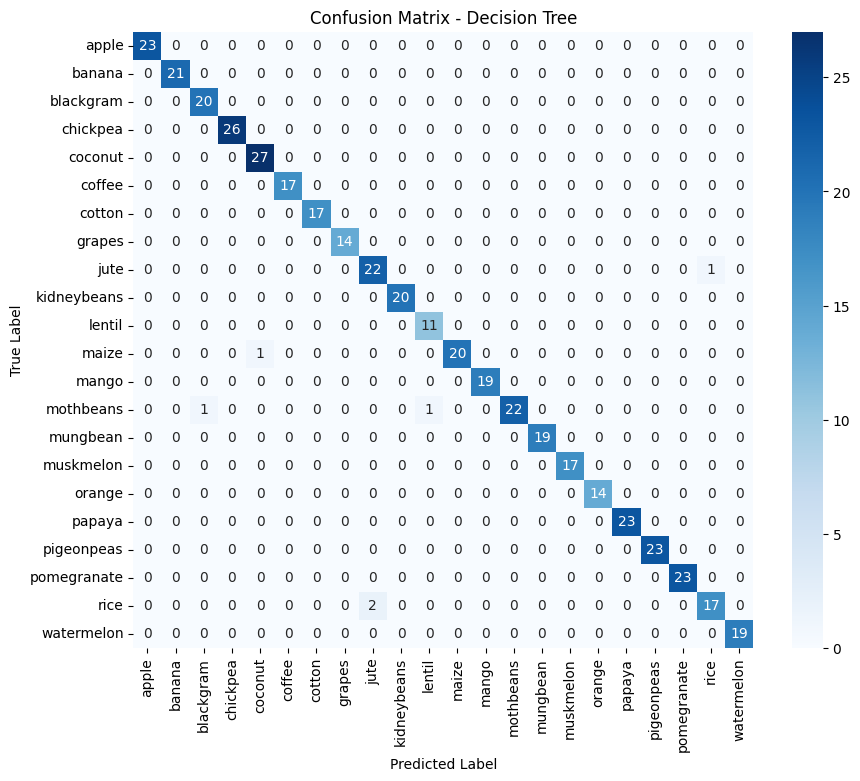


Model evaluation complete.


In [ ]:

# K-Nearest Neighbors (KNN) Model
print("Implementing and evaluating K-Nearest Neighbors (KNN)...")
knn_model = KNeighborsClassifier(n_neighbors=5) # You can adjust n_neighbors
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn, recall_knn, f1_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"KNN Precision: {precision_knn:.4f}")
print(f"KNN Recall: {recall_knn:.4f}")
print(f"KNN F1-score: {f1_knn:.4f}")

# Plot Confusion Matrix for KNN
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - KNN')
plt.show()

print("\n" + "="*50 + "\n")

# Decision Tree Classifier Model
print("Implementing and evaluating Decision Tree Classifier...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt, recall_dt, f1_dt, _ = precision_recall_fscore_support(y_test, y_pred_dt, average='weighted')
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")
print(f"Decision Tree F1-score: {f1_dt:.4f}")

# Plot Confusion Matrix for Decision Tree
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("\nModel evaluation complete.")


In [ ]:

results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'KNN': [accuracy_knn, precision_knn, recall_knn, f1_knn],
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt, f1_dt]
}
results_df = pd.DataFrame(results)

print("\nPerformance Comparison Table:")
print(results_df.to_markdown(index=False))

# Discussion of strengths and weaknesses:

print("\nDiscussion:")
print("Model Performance:")
print("- Based on the metrics (Accuracy, Precision, Recall, F1-score), the Decision Tree classifier generally performs better than the KNN classifier on this dataset. The Decision Tree achieves higher scores across all evaluated metrics.")
print("- The confusion matrices visually confirm this; the Decision Tree shows a clearer diagonal line, indicating more correct classifications.")

print("\nInterpretability:")
print("- Decision Trees are generally more interpretable than KNN. A Decision Tree provides a set of rules (splits) that lead to a classification, which can be visualized and understood. This makes it easier to explain why a particular prediction was made.")
print("- KNN, on the other hand, makes predictions based on the majority class of its nearest neighbors. While conceptually simple, the decision boundary is implicit and understanding why a specific point was classified a certain way requires examining its neighbors, which can be less straightforward, especially with higher dimensions or large datasets.")

print("\nSensitivity to Data Size or Imbalance:")
print("- KNN's performance can be sensitive to the size of the dataset and the value of 'n_neighbors'. It can become computationally expensive with very large datasets as it needs to calculate distances to all training points during prediction.")
print("- KNN can also be sensitive to imbalanced datasets, where the majority class can dominate the nearest neighbors and lead to biased predictions for minority classes.")
print("- Decision Trees are less sensitive to data size in terms of prediction time complexity compared to KNN. Training time depends on the structure and size, but prediction is relatively fast.")
print("- Decision Trees can also be affected by class imbalance. Techniques like class weighting or using algorithms specifically designed for imbalance might be needed.")
print("- For this specific dataset, which doesn't show extreme imbalance based on the original distribution (assuming a relatively balanced distribution of crop types), both models performed reasonably well, with Decision Tree having an edge.")
print("- The performance difference observed likely stems from how each algorithm captures the underlying patterns in the data, with the Decision Tree's split-based approach appearing more effective for this dataset's structure.")


Performance Comparison Table:
| Metric    |      KNN |   Decision Tree |
|:----------|---------:|----------------:|
| Accuracy  | 0.956818 |        0.986364 |
| Precision | 0.962898 |        0.986806 |
| Recall    | 0.956818 |        0.986364 |
| F1-score  | 0.956749 |        0.986315 |

Discussion:
Model Performance:
- Based on the metrics (Accuracy, Precision, Recall, F1-score), the Decision Tree classifier generally performs better than the KNN classifier on this dataset. The Decision Tree achieves higher scores across all evaluated metrics.
- The confusion matrices visually confirm this; the Decision Tree shows a clearer diagonal line, indicating more correct classifications.

Interpretability:
- Decision Trees are generally more interpretable than KNN. A Decision Tree provides a set of rules (splits) that lead to a classification, which can be visualized and understood. This makes it easier to explain why a particular prediction was made.
- KNN, on the other hand, makes predictio